## PyTorch Classification with CIFAR10
#### Landon Buell - July 2023

In [1]:
import os

import torch
import torchvision

In [3]:
# Construct the Transform process for when Images are Loaded

imageNorms = (0.5,0.5,0.5)
imageLoaderTransforms = torchvision.transforms.Compose([ torchvision.transforms.ToTensor(),
                                                         torchvision.transforms.Normalize(imageNorms,imageNorms)])

datasetRoot = "C:\\Users\\lando\\Documents\\datasets"
batchSize = 4

In [5]:
# Build the train set
trainDataset = torchvision.datasets.CIFAR10(root=datasetRoot,train=True,download=True,transform=imageLoaderTransforms)
trainLoader = torch.utils.data.DataLoader(trainDataset,batch_size=batchSize,shuffle=True)

Files already downloaded and verified


In [6]:
# Build the Test set
testDataset = torchvision.datasets.CIFAR10(root=datasetRoot,train=False,download=True,transform=imageLoaderTransforms)
testLoader = torch.utils.data.DataLoader(testDataset,batch_size=batchSize,shuffle=True)

Files already downloaded and verified


In [8]:
# Define the names of each class
CLASS_NAMES = ["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def display(image):
    """ Show an Image """
    image = (image / 2) + 0.5
    numpyImage = image.numpy()
    plt.imshow(np.transpose(numpyImage,(1,2,0)))
    plt.show()

In [12]:
# Get some random training images
trainDataIter = iter(trainLoader)
images,labels = next(trainDataIter)

In [13]:
images.shape

torch.Size([4, 3, 32, 32])

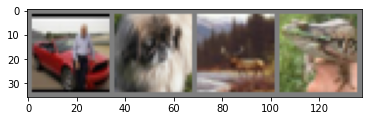

Car Dog Deer Frog


In [14]:
display(torchvision.utils.make_grid(images))
print(" ".join(["{0}".format(CLASS_NAMES[labels[x]]) for x in range(batchSize)]))

In [ ]:
# Define a Convolutional Neural Network

class MyNet(torch.nn.Module):
    """ Basic CNN """
    
    def __init__(self,numClasses: int):
        """ Constructor """
        super().__init__()
        self._numClasses = numClasses
        self._conv1 = torch.nn.Conv2d(in_channels=3,out_channels=16,kernel_size=(5,5),stride=(1,1))
        self._pool = torch.nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self._conv2 = torch.nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(5,5),stride=(1,1))
        
        self._dense1 = torch.nn.Linear(in_features=32*5*5,out_features=128)
        self._dense2 = torch.nn.Linear(in_features=128,out_features=64)
        self._dense3 = torch.nn.Linear(in_features=64,out_features=self._numClasses)
        
    def __del__(self):
        """ Destructor """
        pass
    
    def forward(self,x):
        """ Define forward pass """
        x = self._pool( torch.nn.functional.relu( self._conv1(x) ) )
        x = self._pool( torch.nn.functional.relu( self._conv2(x) ) )
        x = torch.flatten(x,start_dim=1,end_dim=-1)
        x = torch.nn.functional.relu( self._dense1(x) )
        x = torch.nn.functional.relu( self._dense2(x) )
        x =self._dense3(x)
        return x
              

In [ ]:
# Create an instance
myNet = MyNet(len(CLASS_NAMES))

In [ ]:
# Define a Loss & Objective
objective = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(myNet.parameters(),lr=0.001,momentum=0.9)

In [ ]:
# Training Loop for the Network

def train():
    """ Train the Model """
    numEpochs = 2
    losses = []
    runningLoss = 0.0
    
    for epoch in range(numEpochs):
        
        for ii,data in enumerate(trainLoader,0):
            
            # Message - every 100 batches
            if (ii % 1000 == 0):
                print("Training on epoch #{0} 0 batch #{1}".format(epoch,ii))

            # Get the inputs & zero the optimizer
            inputs,labels = data
            optimizer.zero_grad()

            # Forward Pass + Compute Loss
            outputs = myNet(inputs)
            loss = objective(outputs,labels)

            # Back Propagate + Step
            loss.backward()
            optimizer.step()

            # Store loss
            runningLoss += loss.item()
            losses.append(loss.item())
            
    msg = "Finished Training"
    print(msg)
    return losses


In [ ]:
# Execute the training Loop
lossHistory = train()

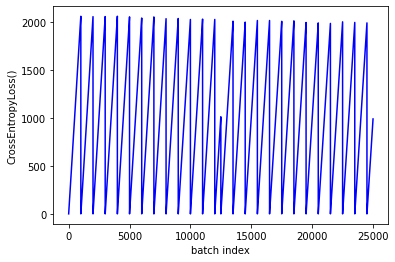

In [48]:
plt.plot(lossHistory,color="blue")
plt.xlabel("batch index")
plt.ylabel(objective)
plt.show()